# 5 Signs You've Become an Advanced Pythonista Without Even Realizing It
## Time to take credit
![](images/pixabay.jpg)

<figcaption style='text-align: center;'>
Image by <a href="https://pixabay.com/users/summerglow-20203311/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=7120431">Charles Thonney</a> from <a href="https://pixabay.com//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=7120431">Pixabay</a>
</figcaption>

### Introduction

You've been programming in Python for a while now, whipping up scripts and solving problems left and right. You think you're pretty good, don't you? Well, hold on to your hats folks, because you might just be an advanced Pythonista without even realizing it!

From closure to context managers, I've got a list of advanced Python features that are sure to make you say "I've been using that all along!". 

Even if these things are new to you, you'll have an excellent checklist to complete to take your game to the next level.

### 1. Scope

A critical aspect of advanced Python programming is deep familiarity with the concept of scope. 

Scope defines the order in which the Python interpreter looks up names in a program. Python scope follows the __LEGB__ rule (local, enclosing, global and built-in scopes). According to the rule, when you access a name (it can be anything, a variable, a function  or a class), the interpreter looks for it in _local_, _enclosing_, _global_ and _built-in_ scopes, in order. 

Let's see examples to understand each level better.

__Example 1 - Local Scope__

```python
def func():
    x = 10
    print(x)

func() # 10
print(x) # Raises NameError, x is only defined within the scope of func()
```

Here, `x` is only defined in the scope that is *local* to `func`. That's why it isn't accessible anywhere else in the script.

__Example 2 - Enclosing Scope__

```python
def outer_func():
    x = 20
    def inner_func():
        print(x)
    inner_func()

outer_func() # 20
```

Enclosing scope is the intermediary scope between local and global scopes. In the example above, `x` is in the local scope of `outer_func`. On the other hand, `x` is in the *enclosing scope* relative to the nested `inner_func` function. Local scope always has read-only access to the enclosing scope.

__Example 3 - Global Scope__

```python
x = 30

def func():
    print(x)

func() # 30
```

Here, `x` and `func` are defined in the global scope, which means they can be read from anywhere in the current script. 

To modify them in smaller levels of scope (local and enclosing), they should be accessed with the `global` keyword:

```python
def func2():
    global x
    x = 40
    print(x)

func2() # 40
print(x) # 40
```

__Example 4 - Built-in scope__

Built-in scope includes every already-defined library, class, function, and variable that __doesn't require__ explicit import statements. Some examples of built-in functions and variables in Python include `print`, `len`, `range`, `str`, `int`, `float`, etc.

### 2. Function closure

A firm grasp of scope opens the doors to another important concept - function closure.

By default, after the function finishes execution, it returns to a blank state. This simply means its memory is wiped of all of its past arguments. 

In [5]:
def func(x):
    return x ** 2

func(3)

9

```python
print(x) # NameError 
```

Above, we assigned the value of 3 to `x` but the function forgot it after the execution. What if we don't want it to forget that value of `x`?

This is where function closure comes into play. By defining a variable in the enclosing scope of some inner function, you can store it in memory even after function returns. 

Here is a simple example function that counts the number of times it was executed:

In [7]:
def counter():
    count = 0
    def inner():
        nonlocal count
        count += 1
        return count
    return inner

# Return the inner function
counter = counter()
print(counter()) # 1
print(counter()) # 2
print(counter()) # 3

1
2
3


By all rules of Python, we should have lost the `counter` variable after the first execution. But since it is in the function's closure, it will stay there till you close the session:

In [12]:
counter.__closure__[0].cell_contents

3

### 3. Decorators

In [2]:
def stateful_function(func):
    cache = {}
    def inner(*args, **kwargs):
        key = str(args) + str(kwargs)
        if key not in cache:
            cache[key] = func(*args, **kwargs)
        return cache[key]
    return inner

In [3]:
@stateful_function
def fibonacci(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)

In [4]:
import time

def timer():
    start = time.time()
    def inner():
        elapsed = time.time() - start
        return elapsed
    return inner

timer = timer()
print(timer()) # elapsed time since the timer was created
time.sleep(1)
print(timer()) # elapsed time since the timer was created, including the 1 second sleep

1.3589859008789062e-05
1.0012729167938232


In [5]:
import time

def log_decorator(func):
    def inner(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        print(f"{func.__name__} was called with arguments {args} and keyword arguments {kwargs} and returned {result}. It took {end - start:.2f} seconds to execute.")
        return result
    return inner

@log_decorator
def add(a, b):
    return a + b

print(add(1, 2))

add was called with arguments (1, 2) and keyword arguments {} and returned 3. It took 0.00 seconds to execute.
3


### 4. Generators

In [6]:
def fibonacci():
    a, b = 0, 1
    while True:
        yield a
        a, b = b, a + b

fib = fibonacci()
print(next(fib)) # 0
print(next(fib)) # 1
print(next(fib)) # 1
print(next(fib)) # 2
print(next(fib)) # 3

0
1
1
2
3


```python
def read_large_file(filename):
    with open(filename) as f:
        while True:
            chunk = f.read(1024)
            if not chunk:
                break
            yield chunk

for chunk in read_large_file("large_file.txt"):
    process(chunk)    
```

### 5. Context managers

In [8]:
import time

class TimerContextManager:
    def __enter__(self):
        self.start = time.time()

    def __exit__(self, type, value, traceback):
        end = time.time()
        print(f"The code took {end - self.start:.2f} seconds to execute.")

with TimerContextManager():
    # This code is timed
    time.sleep(1)

The code took 1.00 seconds to execute.


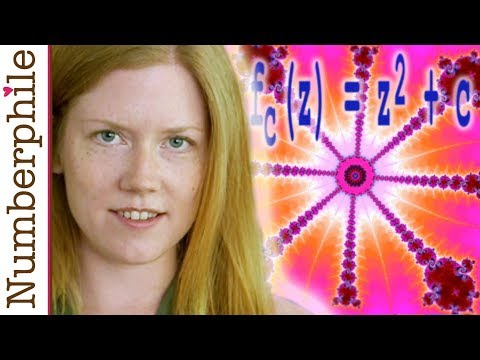

In [8]:
from IPython.display import YouTubeVideo

YouTubeVideo("NGMRB4O922I")

### Conclusion